<a href="https://colab.research.google.com/github/arifanwar0243/colabs/blob/main/materi/6_Time_Delay_in_Dynamic_Systems_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Delay in Dynamic Systems 

Time delay is a shift in the effect of an input on an output dynamic response. A first-order linear system with time delay is:

$$\tau_p \dfrac{dy(t)}{dt} = -y(t) + K_p u\left(t-\theta_p\right)$$

has variables $y(t)$ and $u(t)$ and three unknown parameters with

- $K_p$ is process gain
- $\tau_p$ is process time constant
- $\theta_p$ is process dead time

The time delay $\theta_p$ is expressed as a time shift in the input variable $u(t)$.

$$
u\left(t-\theta_p\right)
$$

$$
y(t \lt \theta_p) = y(0)
$$

$$
y(t \ge \theta_p) = \left( e^{-\left(t - \theta_p \right) / \tau_p}\right) y(0) + \left( 1 - e^{-\left(t - \theta_p \right) / \tau_p} \right) K_p \Delta u
$$

For a step change $\Delta u$ the analytical solution for a first-order linear system without time delay 
( $x(t) = y(t)$ with $\theta_p=0$ ) 

$$
\tau_p \dfrac{\text{d}x(t)}{\text{d}t} = -y(t) + K_p u\left(t\right)
$$

is

\begin{eqnarray}
x(t) &=& K_p \left(1-\exp\left(\dfrac{-t}{\tau_p}\right)\right) \Delta u \\
&=& K_p \left( 1-e^{\left(\dfrac{-t}{\tau_p}\right)} \right) \Delta u
\end{eqnarray}

With dead-time, the solution becomes:
\begin{eqnarray}
y(t) &=& x \left( t-\theta_p \right) S \left( t-\theta_p \right) \\
&=& K_p \left( 1-  \exp\left(-\dfrac{ t-\theta_p } { \tau_p } \right) \right) \, \Delta u \, S \left( t-\theta_p \right) \\
&=& K_p \left( 1-  e^{\left(-\dfrac{ t-\theta_p } { \tau_p } \right)} \right) \, \Delta u \, S \left( t-\theta_p \right)
\end{eqnarray}
where $S\left(t-\theta_p\right)$ is a step function that changes from zero to one at $t=\theta_p$.



## Analytic Solution Derivation with Laplace Transforms

Start with the linear differential equation with time delay:
$$
\tau_p \dfrac{\text{d}y(t)}{\text{d}t} = -y(t) + K_p u\left(t-\theta_p\right)
$$

Perform a Laplace transform from the tables on each part of the equation:
$$
\mathcal{L}\left(\tau_p \dfrac{\text{d}y(t)}{\text{d}t}\right) = \tau_p \left(s Y(s) - y(0)\right)
$$

$$
\mathcal{L}\left(-y(t)\right) = -Y(s)
$$

$$
\mathcal{L}\left(K_p u\left(t-\theta_p\right)\right) = K_p U(s) e^{-\theta_p s}
$$

If the input $U(s)$ is a step function of size $\Delta u$ then:
$$
U(s) = \dfrac{\Delta u}{s}
$$

Combining all of the individual Laplace transforms, the equation in Laplace domain with zero initial condition $y(0)=0$ is then:

$$
\tau_p \, s \, Y(s) = -Y(s) + K_p \dfrac{\Delta u}{s} e^{-\theta_p s}
$$

and factoring out the $Y(s)$ term:
$$
Y(s) \left(\tau_p \, s + 1\right) = K_p \dfrac{\Delta u}{s} e^{-\theta_p s}
$$

A final steps are to isolate $Y(s)$ on the left side of the equation and perform an inverse Laplace transform to return to the time domain:

$$
Y(s) = K_p \dfrac{\Delta u}{s\,\left(\tau_p \, s + 1\right)} e^{-\theta_p s}
$$

$$
\mathcal{L}^{-1}\left(Y(s)\right) = y(t) =  K_p \left( 1-\exp \left( -\frac{ \left( t-\theta_p \right) } { \tau_p } \right) \right) \, \Delta u \, S \left( t-\theta_p \right)
$$



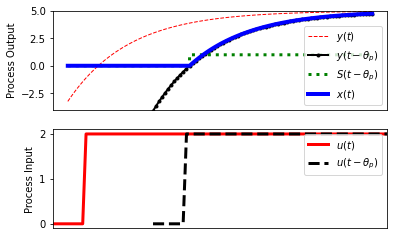

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# specify number of steps
ns = 100
# define time points
t = np.linspace(0,ns/10.0,ns+1)

class model(object):
    # process model
    Kp = 2.0
    taup = 200.0
    thetap = 0.0

def process(y,t,u,Kp,taup):
    # Kp = process gain
    # taup = process time constant
    dydt = -y/taup + Kp/taup * u
    return dydt

def calc_response(t,m):
    # t = time points
    # m = process model
    Kp = m.Kp
    taup = m.taup
    thetap = m.thetap
    # specify number of steps
    ns = len(t)-1

    delta_t = t[1]-t[0]

    # storage for recording values
    op = np.zeros(ns+1)  # controller output
    pv = np.zeros(ns+1)  # process variable

    # step input
    op[10:]=2.0

    # Simulate time delay
    ndelay = int(np.ceil(thetap / delta_t)) 

    # loop through time steps    
    for i in range(0,ns):
        # implement time delay
        iop = max(0,i-ndelay)
        y = odeint(process,pv[i],[0,delta_t],args=(op[iop],Kp,taup))
        pv[i+1] = y[-1]
    return (pv,op) 

# calculate step response
model.Kp = 2.5
model.taup = 2.0
model.thetap = 3.0
(pv,op) = calc_response(t,model)

pv2 = np.zeros(len(t))
for i in range(len(t)):
    pv2[i] = model.Kp * (1.0 - np.exp(-(t[i]-model.thetap-1.0)/model.taup))*2.0

pv3 = np.zeros(len(t))
for i in range(len(t)):
    pv3[i] = model.Kp * (1.0 - np.exp(-(t[i]-1.0)/model.taup))*2.0

plt.figure(1)
plt.subplot(2,1,1)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.plot(t,pv3,'r--',linewidth=1,label=r'$y(t)$')
plt.plot(t,pv2,'k.-',linewidth=2,label=r'$y(t-\theta_p)$')
plt.plot([0,4,4.0001,10],[0,0,1,1],'g:',linewidth=3,label=r'$S(t- \theta _p)$')
plt.plot(t,pv,'b-',linewidth=4,label=r'$x(t)$')
plt.legend(loc='best')
plt.ylabel('Process Output')
plt.ylim([-4,5])

plt.subplot(2,1,2)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.plot(t,op,'r-',linewidth=3,label=r'$u(t)$')
plt.plot(t+3.0,op,'k--',linewidth=3,label=r'$u(t-\theta_p)$')
plt.ylim([-0.1,2.1])
plt.xlim([0,10])
plt.legend(loc='best')
plt.ylabel('Process Input')

plt.xlabel('Time')

plt.savefig('output.png')
plt.show()